<a href="https://colab.research.google.com/github/anse128/RNA/blob/main/ia_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Esto montará tu Google Drive en el directorio '/content/drive'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Esto montará tu Google Drive en el directorio '/content/drive'
drive.mount('/content/drive')

# Cargar los datos
base_dir = '/content/drive/My Drive/HW1'
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # Ajustar según sea necesario

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 100), # Ajustar según sea necesario
    batch_size=2751,
    class_mode='binary',
    color_mode='grayscale', # 1 canal
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 100), # Ajustar según sea necesario
    batch_size=20,
    class_mode='binary',
    color_mode='grayscale', # 1 canal
    subset='validation')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2751 images belonging to 2 classes.
Found 687 images belonging to 2 classes.


ValueError: ignored

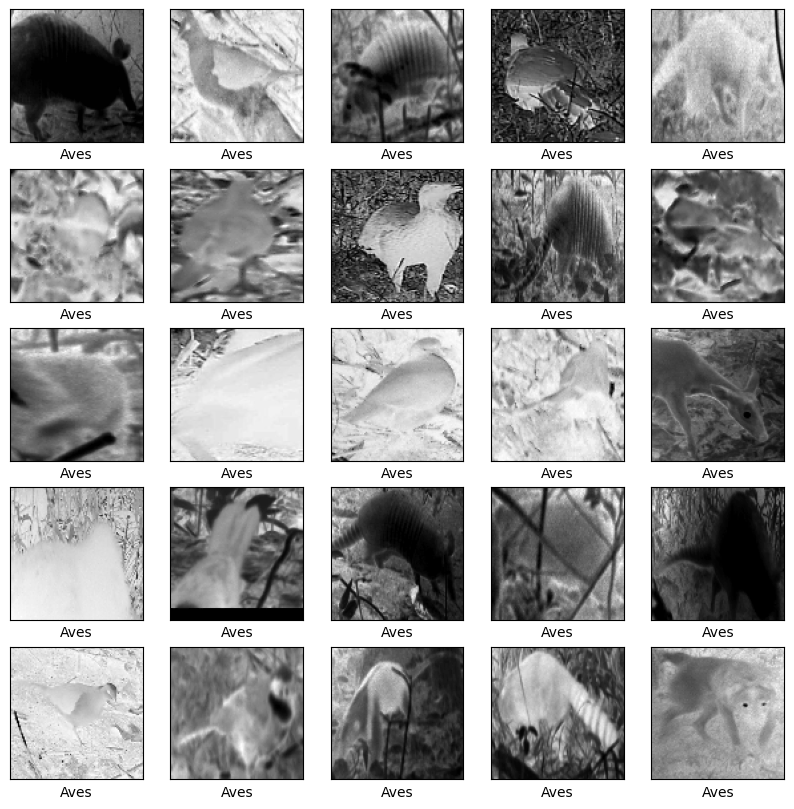

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtén un lote de imágenes y etiquetas del generador de entrenamiento
images, labels = next(train_generator)

# Configura el tamaño de la figura
plt.figure(figsize=(10, 10))

# Imprime las imágenes del lote
for i in range(len(images)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)

    # Convierte la codificación "one-hot" a una etiqueta única
    label = np.argmax(labels[i])

    # Encuentra el nombre de la clase correspondiente a la etiqueta
    class_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(label)]

    # Imprime la clase de la imagen
    plt.xlabel(class_name)

# Muestra la figura con las imágenes
plt.show()


Define y compila tu modelo CNN. Aquí puedes utilizar una arquitectura simple. Por ejemplo:


Entrena el modelo con los datos de entrenamiento y validación. Puedes ajustar el número de épocas y otros hiperparámetros según sea necesario.

In [ ]:
# Importar las librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Crear modelo de red neuronal convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria: Aves o No aves
])

# Crear un optimizador Adam con una tasa de aprendizaje fija
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo con el optimizador personalizado
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
epochs = 10  # número de épocas
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Evaluar el modelo en datos de validación
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Precisión en datos de validación: {validation_accuracy * 100:.2f}%')


Epoch 1/10
1/1 [==============================] - 41s 41s/step - loss: 0.6902 - accuracy: 0.6659 - val_loss: 9.1481 - val_accuracy: 0.5852
Epoch 2/10


In [ ]:
# Calcular el error cometido por la red con los datos de entrenamiento
train_loss, train_accuracy = model.evaluate(train_generator)
print('Error en el conjunto de entrenamiento:', 1 - train_accuracy)

# Calcular el error cometido por la red con los datos de prueba
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print('Error en el conjunto de prueba:', 1 - validation_accuracy)


NameError: ignored